## Euroleague 2020-2021 Season (Stats by Player)

### analysis content
1. 3FG Attempts in general
2. Examination of the relationship between height and 3FG related columns/values
3. Creating Height groups
4. Examination of three-point shooting success rates depending on the height

<div class="alert alert-block alert-danger">
    
<b>Tall players are known to make far fewer three-point attempts than other players. For this reason, Euroleague 2020-2021 season data will be analyzed to examine the relationship between height and three-point shooting.</b>
    
</div>

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy

import warnings;
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Euroleague 2020-2021.xlsx")
df

,Player,Club,Number,Position,Nation,Age,Height,Games,Min,Pts,...,Blocks(Fv),Blocks(Fv)_avg,Blocks(Ag),Blocks(Ag)_avg,Fouls(Cm),Fouls(Cm)_avg,Fouls(Rv),Fouls(Rv)_avg,PIR,PIR_avg
0,"Abalde, Alberto",Real Madrid,6,Forward,Spain,25,202,39,761,281,...,0,0.00,6,0.15,60,1.54,57,1.46,325,8.33
1,"Abrines, Alex",FC Barcelona,21,Forward,Spain,27,198,39,730,237,...,8,0.21,7,0.18,96,2.46,39,1.00,182,4.67
2,"Alocen, Carlos",Real Madrid,12,Guard,Spain,20,194,28,376,110,...,2,0.07,4,0.14,46,1.64,31,1.11,93,3.32
3,"Amaize, Robin",FC Bayern Munich,15,Forward,Germany,26,188,9,51,4,...,0,0.00,1,0.11,6,0.67,2,0.22,-1,-0.11
4,"Anderson, James",Anadolu Efes,23,Forward,USA,31,198,41,622,172,...,6,0.15,3,0.07,55,1.34,39,0.95,234,5.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,"Zakharov, Denis",Zenit St Petersburg,3,Guard,Russian Federation,27,192,17,82,15,...,1,0.06,0,0.00,20,1.18,12,0.71,6,0.35
290,"Zipser, Paul",FC Bayern Munich,16,Forward,Germany,26,203,39,858,356,...,10,0.26,5,0.13,86,2.21,74,1.90,371,9.51
291,"Zizic, Ante",Maccabi Playtika Tel Aviv,23,Center,Croatia,23,210,34,676,309,...,26,0.76,17,0.50,56,1.65,58,1.71,386,11.35
292,"Zoosman, Yovel",Maccabi Playtika Tel Aviv,50,Guard,Poland,22,200,11,150,29,...,0,0.00,1,0.09,22,2.00,7,0.64,18,1.64


### splitting the three-point shots and attempts, converting into an integer type, adding new columns

In [3]:
df[['3FG_Shots', '3FG_Attempts']] = df['3FG'].str.split('/', expand=True).astype('int64')

In [4]:
df['3FG_Avg'] = round((df['3FG_Shots'] / df['3FG_Attempts']), 3)

In [5]:
df['3FG_Attempts/Min'] = df['3FG_Attempts'] / df['Min']

In [6]:
df.isnull().sum().sum()

34

In [7]:
df = df.fillna(0)

In [8]:
df.columns

Index(['Player', 'Club', 'Number', 'Position', 'Nation', 'Age', 'Height',
       'Games', 'Min', 'Pts', 'Pts_avg', '2FG', '3FG', 'FT', 'Rebounds(O)',
       'Rebounds(D)', 'Rebounds(T)', 'Rebounds_avg', 'Assists', 'Assists_avg',
       'Steals', 'Steals_avg', 'Turnovers', 'Turnovers_avg', 'Blocks(Fv)',
       'Blocks(Fv)_avg', 'Blocks(Ag)', 'Blocks(Ag)_avg', 'Fouls(Cm)',
       'Fouls(Cm)_avg', 'Fouls(Rv)', 'Fouls(Rv)_avg', 'PIR', 'PIR_avg',
       '3FG_Shots', '3FG_Attempts', '3FG_Avg', '3FG_Attempts/Min'],
      dtype='object')

### creating a new dataframe with related columns

In [9]:
df1 = df[['Player','Club','Position','Nation','Age','Height','Games','Min','Pts',
          '3FG_Shots','3FG_Attempts','3FG_Avg','3FG_Attempts/Min']]

In [10]:
df1

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3FG_Shots,3FG_Attempts,3FG_Avg,3FG_Attempts/Min
0,"Abalde, Alberto",Real Madrid,Forward,Spain,25,202,39,761,281,50,115,0.435,0.151117
1,"Abrines, Alex",FC Barcelona,Forward,Spain,27,198,39,730,237,55,130,0.423,0.178082
2,"Alocen, Carlos",Real Madrid,Guard,Spain,20,194,28,376,110,11,39,0.282,0.103723
3,"Amaize, Robin",FC Bayern Munich,Forward,Germany,26,188,9,51,4,0,3,0.000,0.058824
4,"Anderson, James",Anadolu Efes,Forward,USA,31,198,41,622,172,23,51,0.451,0.081994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,"Zakharov, Denis",Zenit St Petersburg,Guard,Russian Federation,27,192,17,82,15,1,11,0.091,0.134146
290,"Zipser, Paul",FC Bayern Munich,Forward,Germany,26,203,39,858,356,60,137,0.438,0.159674
291,"Zizic, Ante",Maccabi Playtika Tel Aviv,Center,Croatia,23,210,34,676,309,0,0,0.000,0.000000
292,"Zoosman, Yovel",Maccabi Playtika Tel Aviv,Guard,Poland,22,200,11,150,29,7,18,0.389,0.120000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            294 non-null    object 
 1   Club              294 non-null    object 
 2   Position          294 non-null    object 
 3   Nation            294 non-null    object 
 4   Age               294 non-null    int64  
 5   Height            294 non-null    int64  
 6   Games             294 non-null    int64  
 7   Min               294 non-null    int64  
 8   Pts               294 non-null    int64  
 9   3FG_Shots         294 non-null    int64  
 10  3FG_Attempts      294 non-null    int64  
 11  3FG_Avg           294 non-null    float64
 12  3FG_Attempts/Min  294 non-null    float64
dtypes: float64(2), int64(7), object(4)
memory usage: 30.0+ KB


In [12]:
df1.describe()

,Age,Height,Games,Min,Pts,3FG_Shots,3FG_Attempts,3FG_Avg,3FG_Attempts/Min
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,27.578231,199.710884,24.057823,450.500000,177.105442,20.108844,53.156463,0.301153,0.110390
std,4.565676,8.186067,11.480807,305.773386,147.231397,21.237365,53.927483,0.171227,0.076220
min,17.000000,178.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,193.000000,15.000000,168.500000,42.250000,2.000000,6.000000,0.250000,0.059201
50%,28.000000,200.000000,28.000000,471.000000,151.500000,14.000000,40.000000,0.350500,0.107478
75%,31.000000,205.000000,33.000000,700.750000,281.000000,33.500000,87.000000,0.407000,0.154108
max,40.000000,223.000000,41.000000,1200.000000,668.000000,89.000000,244.000000,1.000000,0.500000


### general statistics of 3FG_Attempts

In [13]:
df1[['3FG_Attempts']].apply(['count', 'sum', 'max', 'min', np.mean]).T

,count,sum,max,min,mean
3FG_Attempts,294.0,15628.0,244.0,0.0,53.156463


In [14]:
df1[['3FG_Attempts']].describe().T

,count,mean,std,min,25%,50%,75%,max
3FG_Attempts,294.0,53.156463,53.927483,0.0,6.0,40.0,87.0,244.0


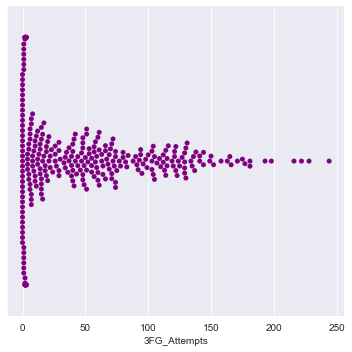

In [15]:
sns.set_style('darkgrid')
sns.catplot(x="3FG_Attempts", data=df1, kind='swarm', palette=['purple']);

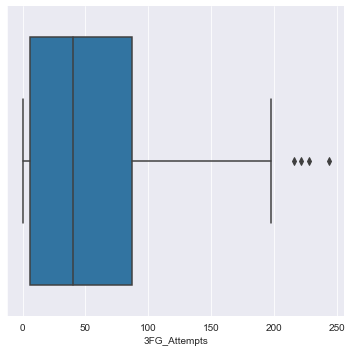

In [16]:
sns.catplot(x="3FG_Attempts", data=df1, kind='box');

### no outliers in the lower bound and there are only 4 outliers in the upper bound

In [17]:
IQR = df1['3FG_Attempts'].quantile(0.75) - df1['3FG_Attempts'].quantile(0.25)
IQR

81.0

In [18]:
upper_lim = df1['3FG_Attempts'].quantile(0.75) + 1.5*IQR
upper_lim

208.5

In [19]:
df1[df1['3FG_Attempts'] > upper_lim]

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3FG_Shots,3FG_Attempts,3FG_Avg,3FG_Attempts/Min
143,"Larkin, Shane",Anadolu Efes,Guard,USA,28,182,35,1003,528,87,222,0.392,0.221336
190,"Pangos, Kevin",Zenit St Petersburg,Guard,Slovenia,27,186,39,1130,528,89,228,0.390,0.201770
234,"Shved, Alexey",Khimki Moscow Region,Guard,Russian Federation,32,198,23,749,455,72,216,0.333,0.288385
285,"Wilbekin, Scottie",Maccabi Playtika Tel Aviv,Guard,USA,27,188,34,920,470,80,244,0.328,0.265217


#### <span style="color:purple">the outliers are players in guard position and below two meters

In [20]:
# the number of players who did not attempt to 3FG shoot

len(df1[df1['3FG_Attempts'] == 0])

34

### correlations (relationships)

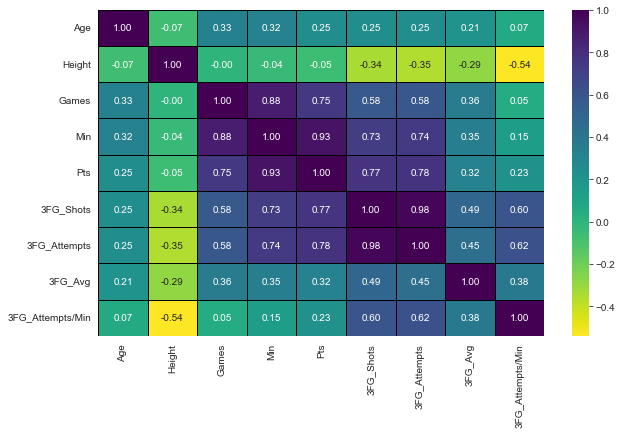

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df1.corr(), annot=True, fmt='.2f', cmap='viridis_r', linewidth=1, linecolor='black');

#### <span style="color:purple">There is a negative correlation (relationship) between height and 3FG related columns/values.

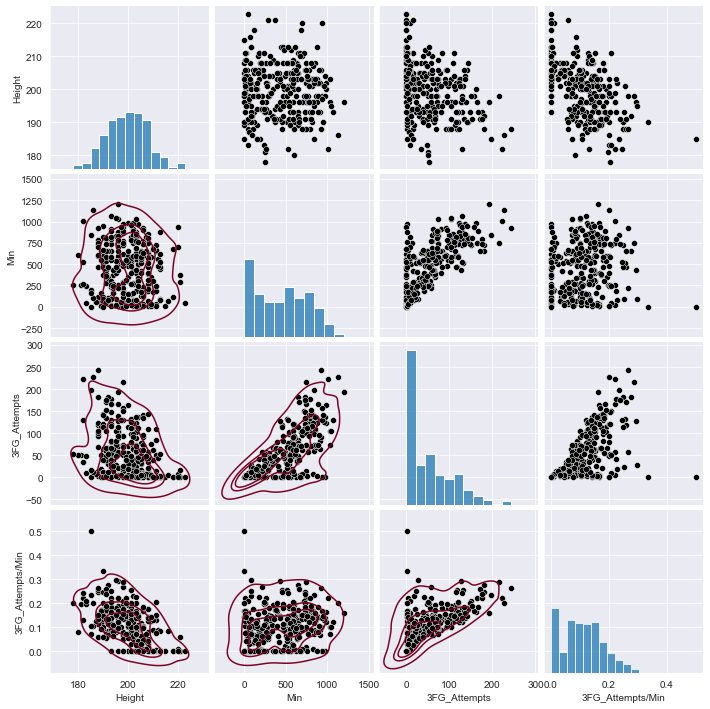

In [22]:
sns.set_style('darkgrid')

g = sns.pairplot(df1[['Height','Min','3FG_Attempts','3FG_Attempts/Min']], diag_kind="hist", plot_kws={'color':'black'})
g.map_lower(sns.kdeplot, levels=4, color='xkcd:wine red');

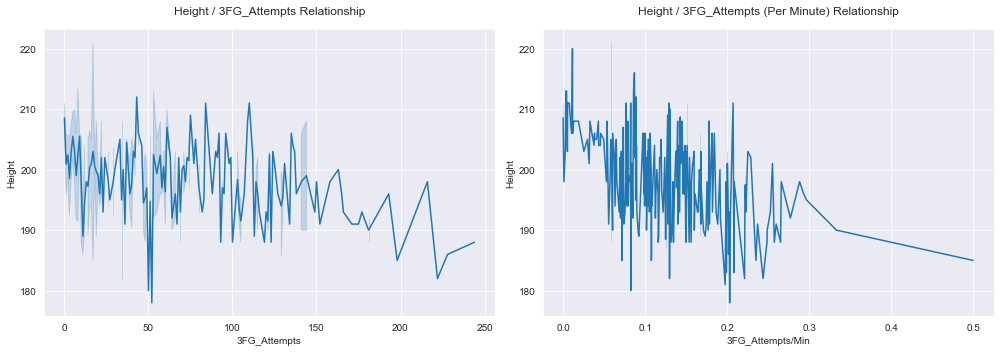

In [23]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.lineplot(x='3FG_Attempts', y='Height', data=df1, ax=ax[0])
sns.lineplot(x='3FG_Attempts/Min', y='Height', data=df1, ax=ax[1])

ax[0].set_title('Height / 3FG_Attempts Relationship', pad=15)
ax[1].set_title('Height / 3FG_Attempts (Per Minute) Relationship', pad=15)

fig.tight_layout();

### grouping of 'Heights' column's values

In [24]:
df1[['Height']].describe().T

,count,mean,std,min,25%,50%,75%,max
Height,294.0,199.710884,8.186067,178.0,193.0,200.0,205.0,223.0


In [25]:
df1['Height_Group'] = ['178-188' if x<189 else '189-199' if x<200 else '200-210' if x<211 
                       else '211-223' for x in df['Height'].values]

In [26]:
df1

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3FG_Shots,3FG_Attempts,3FG_Avg,3FG_Attempts/Min,Height_Group
0,"Abalde, Alberto",Real Madrid,Forward,Spain,25,202,39,761,281,50,115,0.435,0.151117,200-210
1,"Abrines, Alex",FC Barcelona,Forward,Spain,27,198,39,730,237,55,130,0.423,0.178082,189-199
2,"Alocen, Carlos",Real Madrid,Guard,Spain,20,194,28,376,110,11,39,0.282,0.103723,189-199
3,"Amaize, Robin",FC Bayern Munich,Forward,Germany,26,188,9,51,4,0,3,0.000,0.058824,178-188
4,"Anderson, James",Anadolu Efes,Forward,USA,31,198,41,622,172,23,51,0.451,0.081994,189-199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,"Zakharov, Denis",Zenit St Petersburg,Guard,Russian Federation,27,192,17,82,15,1,11,0.091,0.134146,189-199
290,"Zipser, Paul",FC Bayern Munich,Forward,Germany,26,203,39,858,356,60,137,0.438,0.159674,200-210
291,"Zizic, Ante",Maccabi Playtika Tel Aviv,Center,Croatia,23,210,34,676,309,0,0,0.000,0.000000,200-210
292,"Zoosman, Yovel",Maccabi Playtika Tel Aviv,Guard,Poland,22,200,11,150,29,7,18,0.389,0.120000,200-210


In [27]:
df1.groupby('Height_Group')['3FG_Attempts'].agg(['count', sum, np.mean])

,count,sum,mean
Height_Group,,,
178-188,25,2124,84.960000
189-199,113,7519,66.539823
200-210,129,5586,43.302326
211-223,27,399,14.777778


In [28]:
df1.groupby('Height_Group')['3FG_Attempts'].describe()

,count,mean,std,min,25%,50%,75%,max
Height_Group,,,,,,,,
178-188,25.0,84.960000,77.710724,1.0,15.0,52.0,123.0,244.0
189-199,113.0,66.539823,55.195114,0.0,16.0,57.0,107.0,216.0
200-210,129.0,43.302326,43.924403,0.0,4.0,30.0,71.0,163.0
211-223,27.0,14.777778,28.536526,0.0,0.0,1.0,11.5,110.0


In [29]:
df1.groupby('Height_Group')['3FG_Attempts/Min'].agg(['count', sum, np.mean])

,count,sum,mean
Height_Group,,,
178-188,25,4.506906,0.180276
189-199,113,15.677410,0.138738
200-210,129,11.270656,0.087369
211-223,27,0.999780,0.037029


In [30]:
df1.groupby('Height_Group')['3FG_Attempts/Min'].describe()

,count,mean,std,min,25%,50%,75%,max
Height_Group,,,,,,,,
178-188,25.0,0.180276,0.089973,0.058824,0.125000,0.156091,0.221336,0.500000
189-199,113.0,0.138738,0.066571,0.000000,0.089912,0.134831,0.176904,0.333333
200-210,129.0,0.087369,0.062509,0.000000,0.035088,0.087912,0.140787,0.255361
211-223,27.0,0.037029,0.057115,0.000000,0.000000,0.003436,0.079670,0.207317


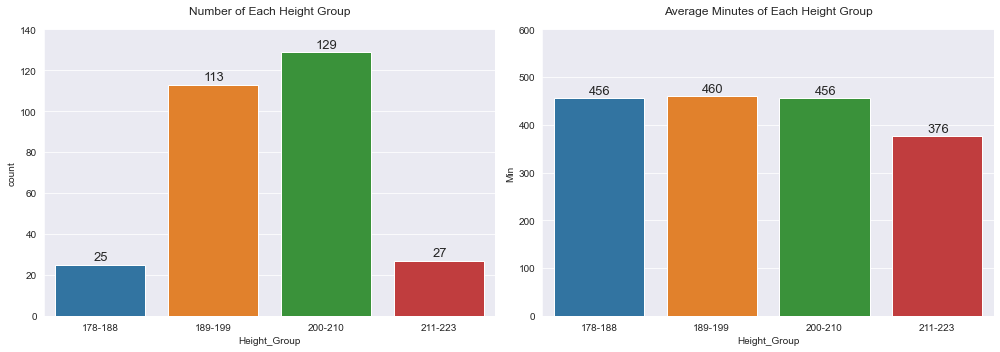

In [31]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.countplot(x="Height_Group", data=df1, ax = ax[0], order=order)
sns.barplot(x="Height_Group", y="Min", data=df1, ax = ax[1], order=order, ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)
    
ax[0].set_title('Number of Each Height Group', pad=15)
ax[1].set_title('Average Minutes of Each Height Group', pad=15)

ax[0].set_ylim(0,140), ax[1].set_ylim(0,600)
fig.tight_layout();

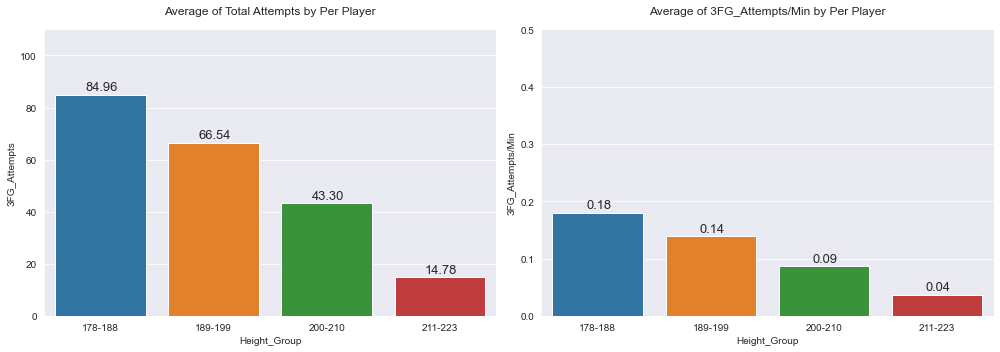

In [32]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.barplot(x="Height_Group", y="3FG_Attempts", data=df1, ax = ax[0], order=order, ci=None)
sns.barplot(x="Height_Group", y="3FG_Attempts/Min", data=df1, ax = ax[1], order=order, ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Average of Total Attempts by Per Player', pad=15)
ax[1].set_title('Average of 3FG_Attempts/Min by Per Player', pad=15)

ax[0].set_ylim(0,110), ax[1].set_ylim(0,0.5)
fig.tight_layout();

### Distributions of 3FG_Attempts For Each Height_Group

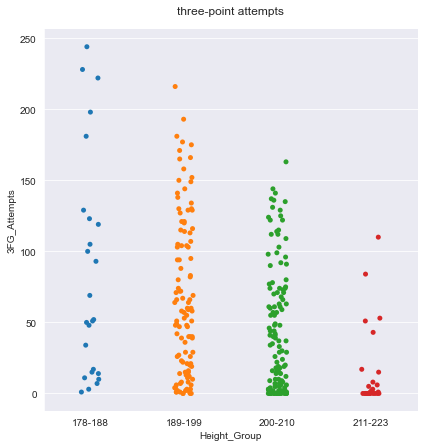

In [33]:
sns.catplot(x="Height_Group", y="3FG_Attempts", data=df1, height=6, aspect=1, 
            order=['178-188', '189-199', '200-210', '211-223'])

plt.title('three-point attempts', pad=15);

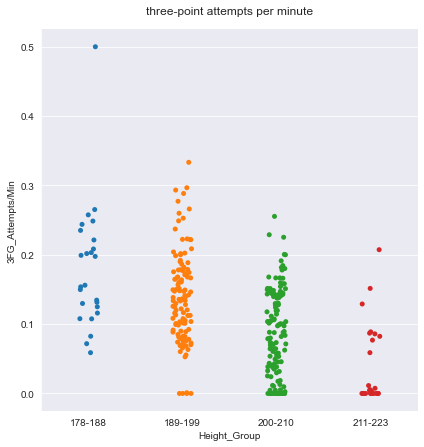

In [34]:
sns.catplot(x="Height_Group", y="3FG_Attempts/Min", data=df1, height=6, aspect=1, 
            order=['178-188', '189-199', '200-210', '211-223'])

plt.title('three-point attempts per minute', pad=15);

### Analyzing the minutes of players' who have 0 attempts and not

#### it can be considered that players who didnot make any attempt take very little time, so we will check it out 

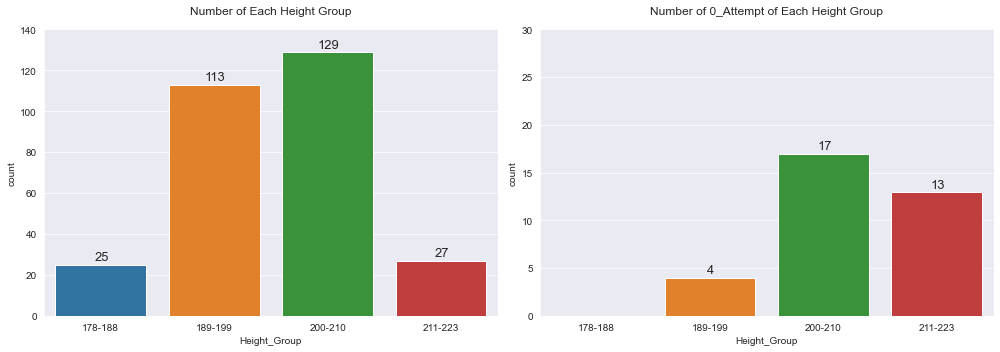

In [35]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=['178-188', '189-199', '200-210', '211-223']
aa = df1[df1['3FG_Attempts'] == 0]['Height_Group']

sns.countplot(x="Height_Group", data=df1, ax = ax[0], order=order)
sns.countplot(x=aa, data=df1, ax = ax[1], order=order)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)
    
ax[0].set_title('Number of Each Height Group', pad=15)
ax[1].set_title('Number of 0_Attempt of Each Height Group', pad=15)

ax[0].set_ylim(0,140), ax[1].set_ylim(0,30)
fig.tight_layout();

In [36]:
df1[df1['3FG_Attempts'] == 0].groupby('Height_Group')['Min'].mean()

Height_Group
189-199      5.250000
200-210    253.764706
211-223    306.692308
Name: Min, dtype: float64

In [37]:
df1[df1['3FG_Attempts'] != 0].groupby('Height_Group')['Min'].mean()

Height_Group
178-188    455.800000
189-199    477.100917
200-210    487.071429
211-223    441.000000
Name: Min, dtype: float64

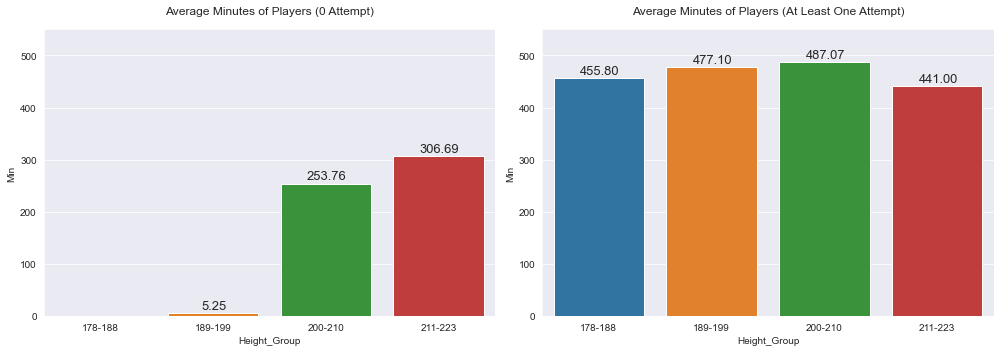

In [38]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.barplot(x=df1["Height_Group"], y=df1[df1['3FG_Attempts'] == 0]['Min'], ax = ax[0], order=order, ci=None)
sns.barplot(x=df1["Height_Group"], y=df1[df1['3FG_Attempts'] != 0]['Min'], ax = ax[1], order=order, ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Average Minutes of Players (0 Attempt)', pad=15)
ax[1].set_title('Average Minutes of Players (At Least One Attempt)', pad=15)

ax[0].set_ylim(0,550), ax[1].set_ylim(0,550)
fig.tight_layout();

#### <span style="color:purple">in the first graph: It is clear that 0_Attempts is not related to Minutes; 
#### <span style="color:purple">in the second graph: When 0_Attempts are removed, it can be seen that the duration of the game per player is very close to each other.

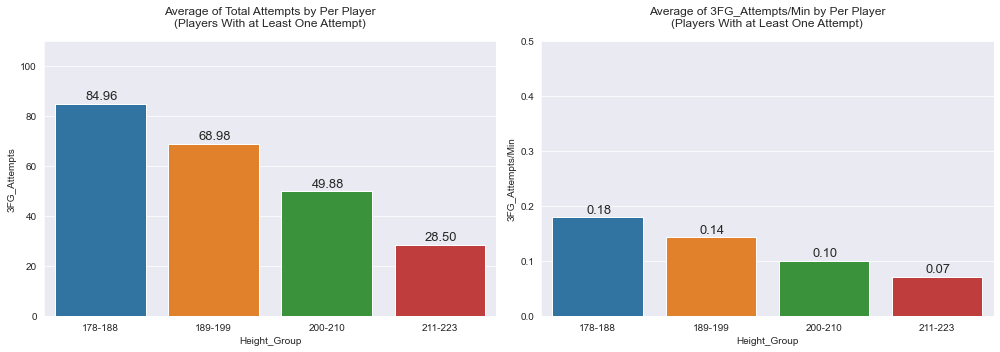

In [39]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.barplot(x="Height_Group", y="3FG_Attempts", data=df1[df1['3FG_Attempts'] != 0], ax = ax[0], order=order, ci=None)
sns.barplot(x="Height_Group", y="3FG_Attempts/Min", data=df1[df1['3FG_Attempts'] != 0], ax = ax[1], order=order, ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('Average of Total Attempts by Per Player\n(Players With at Least One Attempt)', pad=15)
ax[1].set_title('Average of 3FG_Attempts/Min by Per Player\n(Players With at Least One Attempt)', pad=15)

ax[0].set_ylim(0,110), ax[1].set_ylim(0,0.5)
fig.tight_layout();

#### <span style="color:purple">even after removing those with no attempts, the negative relationship between each height groups doesn't change

### Checking outliers for each height group

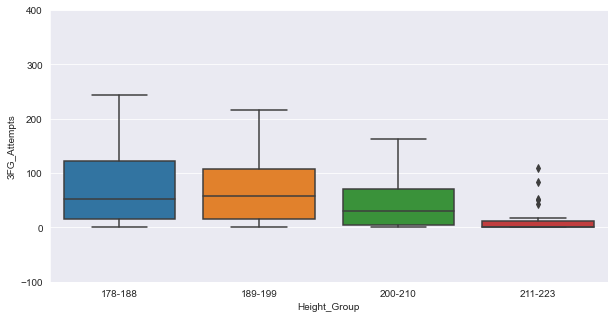

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Height_Group', y='3FG_Attempts', data=df1, order=['178-188', '189-199', '200-210', '211-223'])
plt.ylim(-100,400);

In [41]:
outliers = df1[df1['Height_Group'] == '211-223'].sort_values(by='3FG_Attempts', ascending=False)[:4]
outliers

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3FG_Shots,3FG_Attempts,3FG_Avg,3FG_Attempts/Min,Height_Group
273,"Voigtmann, Johannes",CSKA Moscow,Forward,Germany,28,211,37,726,313,51,110,0.464,0.151515,211-223
15,"Bender, Dragan",Maccabi Playtika Tel Aviv,Forward,Croatia,23,211,34,651,225,29,84,0.345,0.129032,211-223
258,"Tobey, Mike",Valencia Basket,Center,Slovenia,26,213,33,617,318,21,53,0.396,0.085900,211-223
212,"Randolph, Anthony",Real Madrid,Forward,USA,31,211,13,246,121,19,51,0.373,0.207317,211-223


In [42]:
non_outliers = df1[df1['Height_Group'] == '211-223'].sort_values(by='3FG_Attempts', ascending=False)[4:]
non_outliers

,Player,Club,Position,Nation,Age,Height,Games,Min,Pts,3FG_Shots,3FG_Attempts,3FG_Avg,3FG_Attempts/Min,Height_Group
224,"Sanli, Sertac",Anadolu Efes,Center,Turkey,29,212,34,484,266,15,43,0.349,0.088843,211-223
197,"Pleiss, Tibor",Anadolu Efes,Center,Germany,31,221,24,289,163,7,17,0.412,0.058824,211-223
55,"Diop, Ilimane",Baskonia Vitoria-Gasteiz,Center,Spain,25,211,27,182,36,5,15,0.333,0.082418,211-223
191,"Papagiannis, Georgios",Panathinaikos Opap Athens,Center,Greece,23,220,32,701,283,1,8,0.125,0.011412,211-223
81,"Gasol, Pau",FC Barcelona,Center,Spain,40,216,7,69,32,3,6,0.500,0.086957,211-223
144,"Lauvergne, Joffrey",Zalgiris Kaunas,Center,France,29,211,32,670,343,2,5,0.400,0.007463,211-223
268,"Vesely, Jan",Fenerbahce Beko Istanbul,Center,Czech Republic,30,213,31,873,405,0,3,0.000,0.003436,211-223
169,"Milutinov, Nikola",CSKA Moscow,Center,Serbia,26,213,20,471,197,1,2,0.500,0.004246,211-223
174,"Monroe, Greg",Khimki Moscow Region,Center,USA,30,211,9,182,93,0,1,0.000,0.005495,211-223
276,"Vougioukas, Ian",Panathinaikos Opap Athens,Center,Greece,35,211,3,13,4,0,1,0.000,0.076923,211-223


#### <span style="color:purple">For the 211-223 height group, this is an expected result as almost half of the players in this group did not make any attempt.

### Success Rates of 3FG Attempts

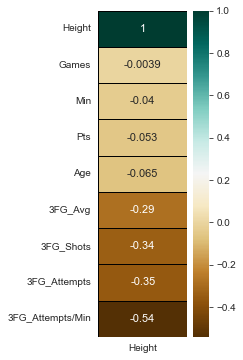

In [43]:
plt.figure(figsize=(2,6))

sns.heatmap(data=df1.corr()[['Height']].sort_values(by='Height', ascending=False), 
            annot_kws={'fontsize':11}, annot=True, cmap='BrBG', linewidth=1, linecolor='black')

plt.show()

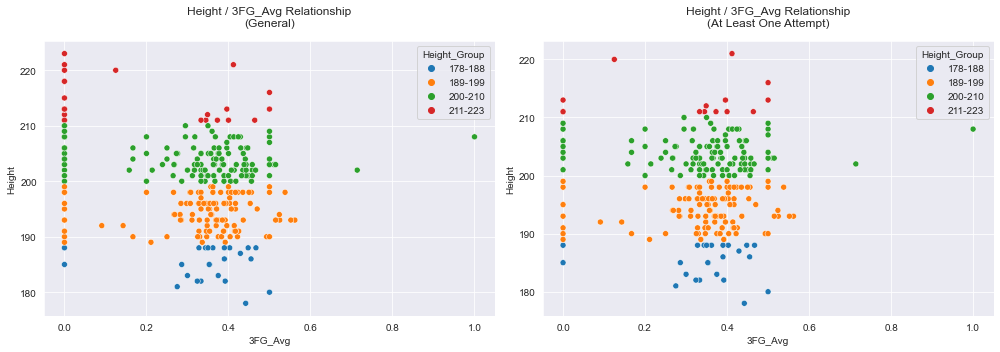

In [44]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.scatterplot(x='3FG_Avg', y='Height', data=df1, hue='Height_Group', hue_order=order, ax=ax[0])
sns.scatterplot(x='3FG_Avg', y='Height', data=df1[df1['3FG_Attempts'] != 0], hue='Height_Group',
                hue_order=order, ax=ax[1])

ax[0].set_title('Height / 3FG_Avg Relationship\n(General)', pad=15)
ax[1].set_title('Height / 3FG_Avg Relationship\n(At Least One Attempt)', pad=15)

fig.tight_layout();

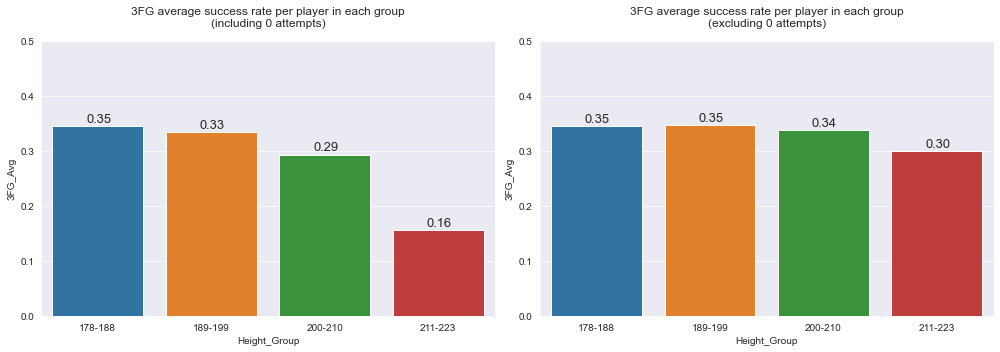

In [45]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

order=['178-188', '189-199', '200-210', '211-223']

sns.barplot(x="Height_Group", y="3FG_Avg", data=df1, ax = ax[0], order=order, ci=None)
sns.barplot(x="Height_Group", y="3FG_Avg", data=df1[df1['3FG_Attempts'] != 0], ax = ax[1], order=order, ci=None)

for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1,7), textcoords='offset points', fontsize=13)
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',xytext=(1,7), textcoords='offset points', fontsize=13)

ax[0].set_title('3FG average success rate per player in each group\n(including 0 attempts)', pad=15)
ax[1].set_title('3FG average success rate per player in each group\n(excluding 0 attempts)', pad=15)

ax[0].set_ylim(0,0.5), ax[1].set_ylim(0,0.5)
fig.tight_layout();

#### <span style="color:purple">For the 211-223 height group, success rate close to other group's success rate in three-point shots (When excluding 0 attempts). Could it be because of outliers?

In [46]:
# success rate of outliers (4 players) of 211-223 Height Group

outliers['3FG_Avg'].mean()

0.3945

In [47]:
# success rate of 211-223 Height Group without outliers

df1[(df1['Height_Group'] == '211-223') & (non_outliers['3FG_Attempts'] != 0)]['3FG_Avg'].mean()

0.26189999999999997

#### <span style="color:purple">It is clear that outliers increase the group's success rate. But without outliers, we cannot say that the success rate of the group is meaningless compared to the others.

### results
1. There is a negative relationship between Height and 3FG Attempts
2. There are players who don't even try the three-pointer as the Height get increase
3. Although the number of players in the first group is almost the same as in the last group, the obvious difference in three-point shooting and success rate is that shorter players have more opportunities for three-point attempts (carrying the ball, setting the game, being athletic/energetic, etc.) so they are more prone to shooting
4. Although the average time spent in the game (per player) of the groups is close, the three-point shooting attempts decrease according to the order of the groups; but shooting success rates are also close to each other (when excluding 0 attempts). Tall players seem to be more likely to achieve near-average success rates in three-point shooting when they try near average.
5. it is possible to establish a three-point shooting relationship for positions mostly determined by height.